# Casos de Dengue nas Regiões metropolitanas do estado de SP: Clusterização e busca por anomalias 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot

## Carregamento dos dados
#### Os dados são anumais, cada arquivo de dados representa um determinado ano.

In [2]:
ds_escolaridade_2016 = pd.read_csv('DataSource\Escolaridade_2016.csv',  sep=';')
ds_escolaridade_2017 = pd.read_csv('DataSource\Escolaridade_2017.csv',  sep=';')
ds_escolaridade_2018 = pd.read_csv('DataSource\Escolaridade_2018.csv',  sep=';')
ds_escolaridade_2019 = pd.read_csv('DataSource\Escolaridade_2019.csv',  sep=';')
ds_escolaridade_2020 = pd.read_csv('DataSource\Escolaridade_2020.csv',  sep=';')

#### Ano 2016

In [3]:
ds_escolaridade_2016.head()

,Reg.Metropolit/RIDE de notific,Ign/Branco,Analfabeto,1 a 4 serie incompleta do EF,4 serie completa do EF,5 a 8 serie incompleta do EF,Ensino fundamental completo,Ensino medio incompleto,Ensino medio completo,Educacao superior incompleta,Educacao superior completa,Nao se aplica,Total
0,35010 Sao Paulo - SP,14157,190,1171,712,1734,1160,1859,4813,764,1308,1094,28962
1,35020 Baixada Santista - SP,3685,6,104,59,192,98,192,725,51,119,645,5876
2,35030 Campinas - SP,6674,13,137,82,334,117,171,471,85,142,571,8797
3,35041 V.Paraiba/Lit Nort 1 -SP,1603,5,36,19,51,26,41,156,30,80,217,2264
4,35042 V.Paraiba/Lit Nort 2 -SP,1059,5,183,104,336,199,374,1526,117,261,314,4478


#### 2017

In [4]:
ds_escolaridade_2017.head()

,Reg.Metropolit/RIDE de notific,Ign/Branco,Analfabeto,1 a 4 serie incompleta do EF,4 serie completa do EF,5 a 8 serie incompleta do EF,Ensino fundamental completo,Ensino medio incompleto,Ensino medio completo,Educacao superior incompleta,Educacao superior completa,Nao se aplica,Total
0,35010 Sao Paulo - SP,902,6,69,40,113,59,137,356,66,135,174,2057
1,35020 Baixada Santista - SP,341,4,20,10,30,26,32,111,21,29,99,723
2,35030 Campinas - SP,446,1,26,10,49,22,27,99,22,42,137,881
3,35041 V.Paraiba/Lit Nort 1 -SP,332,1,3,2,10,3,13,40,6,15,159,584
4,35042 V.Paraiba/Lit Nort 2 -SP,24,-,16,2,12,19,16,29,5,9,35,167


#### 2018

In [5]:
ds_escolaridade_2018.head()

,Reg.Metropolit/RIDE de notific,Ign/Branco,Analfabeto,1 a 4 serie incompleta do EF,4 serie completa do EF,5 a 8 serie incompleta do EF,Ensino fundamental completo,Ensino medio incompleto,Ensino medio completo,Educacao superior incompleta,Educacao superior completa,Nao se aplica,Total
0,35010 Sao Paulo - SP,941,8,47,25,78,56,84,279,36,154,164,1872
1,35020 Baixada Santista - SP,230,1,8,9,13,14,13,38,9,14,53,402
2,35030 Campinas - SP,629,5,47,30,695,46,78,152,20,97,107,1906
3,35041 V.Paraiba/Lit Nort 1 -SP,188,-,1,1,5,4,6,25,6,11,47,294
4,35042 V.Paraiba/Lit Nort 2 -SP,64,-,8,6,2,6,3,39,7,14,19,168


#### 2019 

In [6]:
ds_escolaridade_2019.head()

,Reg.Metropolit/RIDE de notific,Ign/Branco,Analfabeto,1 a 4 serie incompleta do EF,4 serie completa do EF,5 a 8 serie incompleta do EF,Ensino fundamental completo,Ensino medio incompleto,Ensino medio completo,Educacao superior incompleta,Educacao superior completa,Nao se aplica,Total
0,35010 Sao Paulo - SP,15201,151,1307,774,2448,1523,2812,7908,1061,2052,1625,36862
1,35020 Baixada Santista - SP,1751,10,163,115,418,204,355,1037,106,224,399,4782
2,35030 Campinas - SP,35260,75,812,394,1067,697,1029,3321,461,796,2458,46370
3,35041 V.Paraiba/Lit Nort 1 -SP,988,3,43,53,95,60,149,483,54,129,166,2223
4,35042 V.Paraiba/Lit Nort 2 -SP,143,1,22,18,44,33,69,176,33,84,47,670


#### 2020

In [7]:
ds_escolaridade_2020.head()

,Reg.Metropolit/RIDE de notific,Ign/Branco,Analfabeto,1 a 4 serie incompleta do EF,4 serie completa do EF,5 a 8 serie incompleta do EF,Ensino fundamental completo,Ensino medio incompleto,Ensino medio completo,Educacao superior incompleta,Educacao superior completa,Nao se aplica,Total
0,35010 Sao Paulo - SP,1895,12,145,76,216,150,233,811,122,318,299,4277
1,35020 Baixada Santista - SP,1499,6,93,51,196,76,143,426,56,132,375,3053
2,35030 Campinas - SP,6553,19,214,119,334,242,314,1342,164,331,469,10101
3,35041 V.Paraiba/Lit Nort 1 -SP,536,1,26,16,41,26,61,279,18,60,131,1195
4,35042 V.Paraiba/Lit Nort 2 -SP,1092,14,167,133,321,273,371,1432,149,377,237,4566


## Analise Exploratória

In [8]:
ds_escolaridade_2016.info()
ds_escolaridade_2017.info()
ds_escolaridade_2018.info()
ds_escolaridade_2019.info()
ds_escolaridade_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Reg.Metropolit/RIDE de notific  13 non-null     object
 1   Ign/Branco                      13 non-null     int64 
 2   Analfabeto                      13 non-null     object
 3   1 a 4 serie incompleta do EF    13 non-null     int64 
 4   4 serie completa do EF          13 non-null     int64 
 5   5 a 8 serie incompleta do EF    13 non-null     int64 
 6   Ensino fundamental completo     13 non-null     int64 
 7   Ensino medio incompleto         13 non-null     int64 
 8   Ensino medio completo           13 non-null     int64 
 9   Educacao superior incompleta    13 non-null     int64 
 10  Educacao superior completa      13 non-null     int64 
 11  Nao se aplica                   13 non-null     int64 
 12  Total                           13 non-null     int6

## Ajustes dos dados
#### Como observado alguns dados não são inteiros isso acontece porque possuem alvum valor caracter como por exemplo estes valores serão substituidos por 0

In [17]:
def GetDataSourceReplacedCharToZero(dataSource):
    labels = ['Ign/Branco'                  
                ,'Analfabeto'                  
                ,'1 a 4 serie incompleta do EF'
                ,'4 serie completa do EF'      
                ,'5 a 8 serie incompleta do EF'
                ,'Ensino fundamental completo' 
                ,'Ensino medio incompleto'     
                ,'Ensino medio completo'       
                ,'Educacao superior incompleta'
                ,'Educacao superior completa'  
                ,'Nao se aplica']
    for label in labels:
        dataSource.loc[dataSource[label] == '-', label] = 0
        
    return dataSource
        

GetDataSourceReplacedCharToZero(ds_escolaridade_2016)
GetDataSourceReplacedCharToZero(ds_escolaridade_2017)
GetDataSourceReplacedCharToZero(ds_escolaridade_2018)
GetDataSourceReplacedCharToZero(ds_escolaridade_2019)
GetDataSourceReplacedCharToZero(ds_escolaridade_2020)
    
ds_escolaridade_2018.head()

C:\Users\guilh\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Reg.Metropolit/RIDE de notific,Ign/Branco,Analfabeto,1 a 4 serie incompleta do EF,4 serie completa do EF,5 a 8 serie incompleta do EF,Ensino fundamental completo,Ensino medio incompleto,Ensino medio completo,Educacao superior incompleta,Educacao superior completa,Nao se aplica,Total
0,35010 Sao Paulo - SP,941,8,47,25,78,56,84,279,36,154,164,1872
1,35020 Baixada Santista - SP,230,1,8,9,13,14,13,38,9,14,53,402
2,35030 Campinas - SP,629,5,47,30,695,46,78,152,20,97,107,1906
3,35041 V.Paraiba/Lit Nort 1 -SP,188,0,1,1,5,4,6,25,6,11,47,294
4,35042 V.Paraiba/Lit Nort 2 -SP,64,0,8,6,2,6,3,39,7,14,19,168


## Montagem de um unico DataFrame
#### E ajuste dos totais de casos por escolaridade para percentuais, além da adição de uma coluna de população e casos por 100 mil habitantes

In [18]:
#0 - SP
#1 - Baixada
#2 - Campinas
#3 ao 7 - Vl Paraiba
#8 - Jundiai
#9 - Piracicaba
#10 - Sorocaba
def GetDataForOnlyCity(dataSource, cityRow):
    return dataSource.iloc[cityRow][1:12]

In [23]:
#São Paulo
ds_sp_2016 = GetDataForOnlyCity(ds_escolaridade_2016, 0)
ds_sp_2017 = GetDataForOnlyCity(ds_escolaridade_2017, 0)
ds_sp_2018 = GetDataForOnlyCity(ds_escolaridade_2018, 0)
ds_sp_2019 = GetDataForOnlyCity(ds_escolaridade_2019, 0)
ds_sp_2020 = GetDataForOnlyCity(ds_escolaridade_2020, 0)

#Baixa
ds_baixada_santista_2016 = GetDataForOnlyCity(ds_escolaridade_2016, 1)
ds_baixada_santista_2017 = GetDataForOnlyCity(ds_escolaridade_2017, 1)
ds_baixada_santista_2018 = GetDataForOnlyCity(ds_escolaridade_2018, 1)
ds_baixada_santista_2019 = GetDataForOnlyCity(ds_escolaridade_2019, 1)
ds_baixada_santista_2020 = GetDataForOnlyCity(ds_escolaridade_2020, 1)

#Campinas
ds_campinas_2016 = GetDataForOnlyCity(ds_escolaridade_2016, 2)
ds_campinas_2017 = GetDataForOnlyCity(ds_escolaridade_2017, 2)
ds_campinas_2018 = GetDataForOnlyCity(ds_escolaridade_2018, 2)
ds_campinas_2019 = GetDataForOnlyCity(ds_escolaridade_2019, 2)
ds_campinas_2020 = GetDataForOnlyCity(ds_escolaridade_2020, 2)

#Vl Paraiba
ds_vale_paraiba_2016 = GetDataForOnlyCity(ds_escolaridade_2016, 3)
ds_vale_paraiba_2017 = GetDataForOnlyCity(ds_escolaridade_2017, 3)
ds_vale_paraiba_2018 = GetDataForOnlyCity(ds_escolaridade_2018, 3)
ds_vale_paraiba_2019 = GetDataForOnlyCity(ds_escolaridade_2019, 3)
ds_vale_paraiba_2020 = GetDataForOnlyCity(ds_escolaridade_2020, 3)

ds_vale_paraiba_norte_2_2016 = GetDataForOnlyCity(ds_escolaridade_2016, 4)
ds_vale_paraiba_norte_2_2017 = GetDataForOnlyCity(ds_escolaridade_2017, 4)
ds_vale_paraiba_norte_2_2018 = GetDataForOnlyCity(ds_escolaridade_2018, 4)
ds_vale_paraiba_norte_2_2019 = GetDataForOnlyCity(ds_escolaridade_2019, 4)
ds_vale_paraiba_norte_2_2020 = GetDataForOnlyCity(ds_escolaridade_2020, 4)
                               
ds_vale_paraiba_norte_3_2016 = GetDataForOnlyCity(ds_escolaridade_2016, 5)
ds_vale_paraiba_norte_3_2017 = GetDataForOnlyCity(ds_escolaridade_2017, 5)
ds_vale_paraiba_norte_3_2018 = GetDataForOnlyCity(ds_escolaridade_2018, 5)
ds_vale_paraiba_norte_3_2019 = GetDataForOnlyCity(ds_escolaridade_2019, 5)
ds_vale_paraiba_norte_3_2020 = GetDataForOnlyCity(ds_escolaridade_2020, 5)
                               
ds_vale_paraiba_norte_4_2016 = GetDataForOnlyCity(ds_escolaridade_2016, 6)
ds_vale_paraiba_norte_4_2017 = GetDataForOnlyCity(ds_escolaridade_2017, 6)
ds_vale_paraiba_norte_4_2018 = GetDataForOnlyCity(ds_escolaridade_2018, 6)
ds_vale_paraiba_norte_4_2019 = GetDataForOnlyCity(ds_escolaridade_2019, 6)
ds_vale_paraiba_norte_4_2020 = GetDataForOnlyCity(ds_escolaridade_2020, 6)
                               
ds_vale_paraiba_norte_5_2016 = GetDataForOnlyCity(ds_escolaridade_2016, 7)
ds_vale_paraiba_norte_5_2017 = GetDataForOnlyCity(ds_escolaridade_2017, 7)
ds_vale_paraiba_norte_5_2018 = GetDataForOnlyCity(ds_escolaridade_2018, 7)
ds_vale_paraiba_norte_5_2019 = GetDataForOnlyCity(ds_escolaridade_2019, 7)
ds_vale_paraiba_norte_5_2020 = GetDataForOnlyCity(ds_escolaridade_2020, 7)

#Jundiai
ds_jundiai_2016 = GetDataForOnlyCity(ds_escolaridade_2016, 8)
ds_jundiai_2017 = GetDataForOnlyCity(ds_escolaridade_2017, 8)
ds_jundiai_2018 = GetDataForOnlyCity(ds_escolaridade_2018, 8)
ds_jundiai_2019 = GetDataForOnlyCity(ds_escolaridade_2019, 8)
ds_jundiai_2020 = GetDataForOnlyCity(ds_escolaridade_2020, 8)

#Piracicaba
ds_piracicaba_2016 = GetDataForOnlyCity(ds_escolaridade_2016, 9)
ds_piracicaba_2017 = GetDataForOnlyCity(ds_escolaridade_2017, 9)
ds_piracicaba_2018 = GetDataForOnlyCity(ds_escolaridade_2018, 9)
ds_piracicaba_2019 = GetDataForOnlyCity(ds_escolaridade_2019, 9)
ds_piracicaba_2020 = GetDataForOnlyCity(ds_escolaridade_2020, 9)

#Sorocaba
ds_sorocaba_2016 = GetDataForOnlyCity(ds_escolaridade_2016, 10)
ds_sorocaba_2017 = GetDataForOnlyCity(ds_escolaridade_2017, 10)
ds_sorocaba_2018 = GetDataForOnlyCity(ds_escolaridade_2018, 10)
ds_sorocaba_2019 = GetDataForOnlyCity(ds_escolaridade_2019, 10)
ds_sorocaba_2020 = GetDataForOnlyCity(ds_escolaridade_2020, 10)

In [26]:
def GetTotal(dataSource):
    dataSource[0] = pd.to_numeric(dataSource[0])
    dataSource[1] = pd.to_numeric(dataSource[1])
    dataSource[2] = pd.to_numeric(dataSource[2])
    dataSource[3] = pd.to_numeric(dataSource[3])
    dataSource[4] = pd.to_numeric(dataSource[4])
    dataSource[5] = pd.to_numeric(dataSource[5])
    dataSource[6] = pd.to_numeric(dataSource[6])
    dataSource[7] = pd.to_numeric(dataSource[7])
    dataSource[8] = pd.to_numeric(dataSource[8])
    dataSource[9] = pd.to_numeric(dataSource[9])
    dataSource[10] = pd.to_numeric(dataSource[10])
    return np.sum(dataSource)


def GetTotalSuperiorCompleto(dataSource):
    return dataSource[9]

def GetTotalColumn(dataSource, columnName):
    return dataSource[columnName]

def GetDataSourceAlongYears(ds_2016, ds_2017, ds_2018, ds_2019, ds_2020):
    data = {'Ano': [2016, 2017, 2018, 2019, 2020],
        'Perc_Ing/Branco': [GetTotalColumn(ds_2016, 'Ign/Branco'), 
                        GetTotalColumn(ds_2017, 'Ign/Branco'), 
                        GetTotalColumn(ds_2018, 'Ign/Branco'),
                        GetTotalColumn(ds_2019, 'Ign/Branco'),
                        GetTotalColumn(ds_2020, 'Ign/Branco')],
        'Perc_Analfabeto': [GetTotalColumn(ds_2016, 'Analfabeto'), 
                        GetTotalColumn(ds_2017, 'Analfabeto'), 
                        GetTotalColumn(ds_2018, 'Analfabeto'),
                        GetTotalColumn(ds_2019, 'Analfabeto'),
                        GetTotalColumn(ds_2020, 'Analfabeto')],
        'Perc_1 a 4 serie incompleta do EF': [GetTotalColumn(ds_2016, '1 a 4 serie incompleta do EF'), 
                        GetTotalColumn(ds_2017, '1 a 4 serie incompleta do EF'), 
                        GetTotalColumn(ds_2018, '1 a 4 serie incompleta do EF'),
                        GetTotalColumn(ds_2019, '1 a 4 serie incompleta do EF'),
                        GetTotalColumn(ds_2020, '1 a 4 serie incompleta do EF')],
        'Perc_4 serie completa do EF': [GetTotalColumn(ds_2016, '4 serie completa do EF'), 
                        GetTotalColumn(ds_2017, '4 serie completa do EF'), 
                        GetTotalColumn(ds_2018, '4 serie completa do EF'),
                        GetTotalColumn(ds_2019, '4 serie completa do EF'),
                        GetTotalColumn(ds_2020, '4 serie completa do EF')],
        'Perc_5 a 8 serie incompleta do EF': [GetTotalColumn(ds_2016, '5 a 8 serie incompleta do EF'), 
                        GetTotalColumn(ds_2017, '5 a 8 serie incompleta do EF'), 
                        GetTotalColumn(ds_2018, '5 a 8 serie incompleta do EF'),
                        GetTotalColumn(ds_2019, '5 a 8 serie incompleta do EF'),
                        GetTotalColumn(ds_2020, '5 a 8 serie incompleta do EF')],
        'Perc_Ensino fundamental completo': [GetTotalColumn(ds_2016, 'Ensino fundamental completo'), 
                        GetTotalColumn(ds_2017, 'Ensino fundamental completo'), 
                        GetTotalColumn(ds_2018, 'Ensino fundamental completo'),
                        GetTotalColumn(ds_2019, 'Ensino fundamental completo'),
                        GetTotalColumn(ds_2020, 'Ensino fundamental completo')],
         'Perc_Ensino medio incompleto': [GetTotalColumn(ds_2016, 'Ensino medio incompleto'), 
                        GetTotalColumn(ds_2017, 'Ensino medio incompleto'), 
                        GetTotalColumn(ds_2018, 'Ensino medio incompleto'),
                        GetTotalColumn(ds_2019, 'Ensino medio incompleto'),
                        GetTotalColumn(ds_2020, 'Ensino medio incompleto')],
        'Perc_Ensino medio completo': [GetTotalColumn(ds_2016, 'Ensino medio completo'), 
                        GetTotalColumn(ds_2017, 'Ensino medio completo'), 
                        GetTotalColumn(ds_2018, 'Ensino medio completo'),
                        GetTotalColumn(ds_2019, 'Ensino medio completo'),
                        GetTotalColumn(ds_2020, 'Ensino medio completo')],
        'Perc_Educacao superior incompleta': [GetTotalColumn(ds_2016, 'Educacao superior incompleta'), 
                        GetTotalColumn(ds_2017, 'Educacao superior incompleta'), 
                        GetTotalColumn(ds_2018, 'Educacao superior incompleta'),
                        GetTotalColumn(ds_2019, 'Educacao superior incompleta'),
                        GetTotalColumn(ds_2020, 'Educacao superior incompleta')],
        'Percent_Superior_Completo': [GetTotalSuperiorCompleto(ds_2016), 
                        GetTotalSuperiorCompleto(ds_2017), 
                        GetTotalSuperiorCompleto(ds_2018),
                        GetTotalSuperiorCompleto(ds_2019),
                        GetTotalSuperiorCompleto(ds_2020)],
        'Perc_Nao se aplica': [GetTotalColumn(ds_2016, 'Nao se aplica'), 
                        GetTotalColumn(ds_2017, 'Nao se aplica'), 
                        GetTotalColumn(ds_2018, 'Nao se aplica'),
                        GetTotalColumn(ds_2019, 'Nao se aplica'),
                        GetTotalColumn(ds_2020, 'Nao se aplica')],
       'Total Casos': [GetTotal(ds_2016), 
                        GetTotal(ds_2017), 
                        GetTotal(ds_2018),
                        GetTotal(ds_2019),
                        GetTotal(ds_2020)]}
    df = pd.DataFrame(data=data)
    
    df["Percent_Superior_Completo"] = pd.to_numeric(df["Percent_Superior_Completo"])
    df["Perc_Analfabeto"] = pd.to_numeric(df["Perc_Analfabeto"])
    df["Perc_1 a 4 serie incompleta do EF"] = pd.to_numeric(df["Perc_1 a 4 serie incompleta do EF"])
    df["Perc_4 serie completa do EF"] = pd.to_numeric(df["Perc_4 serie completa do EF"])
    df["Perc_5 a 8 serie incompleta do EF"] = pd.to_numeric(df["Perc_5 a 8 serie incompleta do EF"])
    df["Perc_Ensino fundamental completo"] = pd.to_numeric(df["Perc_Ensino fundamental completo"])
    df["Perc_Ensino medio incompleto"] = pd.to_numeric(df["Perc_Ensino medio incompleto"])
    df["Perc_Ensino medio completo"] = pd.to_numeric(df["Perc_Ensino medio completo"])
    df["Perc_Educacao superior incompleta"] = pd.to_numeric(df["Perc_Educacao superior incompleta"])
    df["Percent_Superior_Completo"] = pd.to_numeric(df["Percent_Superior_Completo"])
    df["Perc_Nao se aplica"] = pd.to_numeric(df["Perc_Nao se aplica"])
    
    df["Perc_Ing/Branco"] = (df["Perc_Ing/Branco"] * 100) / df["Total Casos"]
    df["Perc_Analfabeto"] = (df["Perc_Analfabeto"] * 100) / df["Total Casos"]
    df["Perc_1 a 4 serie incompleta do EF"] = (df["Perc_1 a 4 serie incompleta do EF"] * 100) / df["Total Casos"]
    df["Perc_4 serie completa do EF"] = (df["Perc_4 serie completa do EF"] * 100) / df["Total Casos"]
    df["Perc_5 a 8 serie incompleta do EF"] = (df["Perc_5 a 8 serie incompleta do EF"] * 100) / df["Total Casos"]
    df["Perc_Ensino fundamental completo"] = (df["Perc_Ensino fundamental completo"] * 100) / df["Total Casos"]
    df["Perc_Ensino medio incompleto"] = (df["Perc_Ensino medio incompleto"] * 100) / df["Total Casos"]
    df["Perc_Ensino medio completo"] = (df["Perc_Ensino medio completo"] * 100) / df["Total Casos"]
    df["Perc_Educacao superior incompleta"] = (df["Perc_Educacao superior incompleta"] * 100) / df["Total Casos"]
    df["Percent_Superior_Completo"] = (df["Percent_Superior_Completo"] * 100) / df["Total Casos"]
    df["Perc_Nao se aplica"] = (df["Perc_Nao se aplica"] * 100) / df["Total Casos"]
    
    
        
    return df

In [29]:
df_sp = GetDataSourceAlongYears(ds_sp_2016, ds_sp_2017, ds_sp_2018, ds_sp_2019, ds_sp_2020)
df_campinas = GetDataSourceAlongYears(ds_campinas_2016, ds_campinas_2017, ds_campinas_2018, ds_campinas_2019, ds_campinas_2020)
df_baixada_santista = GetDataSourceAlongYears(ds_baixada_santista_2016, ds_baixada_santista_2017, ds_baixada_santista_2018, ds_baixada_santista_2019, ds_baixada_santista_2020)
df_jundiai = GetDataSourceAlongYears(ds_jundiai_2016, ds_jundiai_2017, ds_jundiai_2018, ds_jundiai_2019, ds_jundiai_2020)
df_piracicaba = GetDataSourceAlongYears(ds_piracicaba_2016, ds_piracicaba_2017, ds_piracicaba_2018, ds_piracicaba_2019, ds_piracicaba_2020)
df_vale_paraiba = GetDataSourceAlongYears(ds_vale_paraiba_2016, ds_vale_paraiba_2017, ds_vale_paraiba_2018, ds_vale_paraiba_2019, ds_vale_paraiba_2020)
df_vale_paraiba_norte_2 = GetDataSourceAlongYears(ds_vale_paraiba_norte_2_2016, ds_vale_paraiba_norte_2_2017, ds_vale_paraiba_norte_2_2018, ds_vale_paraiba_norte_2_2019, ds_vale_paraiba_norte_2_2020)
df_vale_paraiba_norte_3 = GetDataSourceAlongYears(ds_vale_paraiba_norte_3_2016, ds_vale_paraiba_norte_3_2017, ds_vale_paraiba_norte_3_2018, ds_vale_paraiba_norte_3_2019, ds_vale_paraiba_norte_3_2020)
df_vale_paraiba_norte_4 = GetDataSourceAlongYears(ds_vale_paraiba_norte_4_2016, ds_vale_paraiba_norte_4_2017, ds_vale_paraiba_norte_4_2018, ds_vale_paraiba_norte_4_2019, ds_vale_paraiba_norte_4_2020)
df_vale_paraiba_norte_5 = GetDataSourceAlongYears(ds_vale_paraiba_norte_5_2016, ds_vale_paraiba_norte_5_2017, ds_vale_paraiba_norte_5_2018, ds_vale_paraiba_norte_5_2019, ds_vale_paraiba_norte_5_2020)
df_sorocaba = GetDataSourceAlongYears(ds_sorocaba_2016, ds_sorocaba_2017, ds_sorocaba_2018, ds_sorocaba_2019, ds_sorocaba_2020)

#### Junção Vale do Paraiba

In [30]:
def GetDataSourceVParaibaAlongYears():
    data = {'Ano': [2016, 2017, 2018, 2019, 2020], 
            'Ign/Branco': [],
            'Analfabeto': [],
            '1 a 4 serie incompleta do EF':[],
            '4 serie completa do EF': [],
            '5 a 8 serie incompleta do EF': [],
            'Ensino fundamental completo': [],
            'Ensino medio incompleto': [],
            'Ensino medio completo': [],
            'Educacao superior incompleta': [],
            'Educacao superior completa': [],
            'Nao se aplica': [],
            'Total Casos': []}
    
    labels = ['Ign/Branco'                  
                ,'Analfabeto'                  
                ,'1 a 4 serie incompleta do EF'
                ,'4 serie completa do EF'      
                ,'5 a 8 serie incompleta do EF'
                ,'Ensino fundamental completo' 
                ,'Ensino medio incompleto'     
                ,'Ensino medio completo'       
                ,'Educacao superior incompleta'
                ,'Educacao superior completa'  
                ,'Nao se aplica'] 
    
    
    for column in labels:
        data[column].append(pd.to_numeric(ds_vale_paraiba_norte_5_2016[column]) 
                            + pd.to_numeric(ds_vale_paraiba_norte_4_2016[column])
                            + pd.to_numeric(ds_vale_paraiba_norte_3_2016[column])
                            + pd.to_numeric(ds_vale_paraiba_norte_2_2016[column])
                            + pd.to_numeric(ds_vale_paraiba_2016[column]))
        
    for column in labels:
        data[column].append(pd.to_numeric(ds_vale_paraiba_norte_5_2017[column]) 
                            + pd.to_numeric(ds_vale_paraiba_norte_4_2017[column])
                            + pd.to_numeric(ds_vale_paraiba_norte_3_2017[column])
                            + pd.to_numeric(ds_vale_paraiba_norte_2_2017[column])
                            + pd.to_numeric(ds_vale_paraiba_2017[column]))
        
    for column in labels:
        data[column].append(pd.to_numeric(ds_vale_paraiba_norte_5_2018[column]) 
                            + pd.to_numeric(ds_vale_paraiba_norte_4_2018[column])
                            + pd.to_numeric(ds_vale_paraiba_norte_3_2018[column])
                            + pd.to_numeric(ds_vale_paraiba_norte_2_2018[column])
                            + pd.to_numeric(ds_vale_paraiba_2018[column]))
        
    for column in labels:
        data[column].append(pd.to_numeric(ds_vale_paraiba_norte_5_2019[column]) 
                            + pd.to_numeric(ds_vale_paraiba_norte_4_2019[column])
                            + pd.to_numeric(ds_vale_paraiba_norte_3_2019[column])
                            + pd.to_numeric(ds_vale_paraiba_norte_2_2019[column])
                            + pd.to_numeric(ds_vale_paraiba_2019[column]))
        
    for column in labels:
        data[column].append(pd.to_numeric(ds_vale_paraiba_norte_5_2020[column]) 
                            + pd.to_numeric(ds_vale_paraiba_norte_4_2020[column])
                            + pd.to_numeric(ds_vale_paraiba_norte_3_2020[column])
                            + pd.to_numeric(ds_vale_paraiba_norte_2_2020[column])
                            + pd.to_numeric(ds_vale_paraiba_2020[column]))
        
      
    
    
    
    for idx in range(0, 5):
        total_row = 0
        for column in labels:
            total_row += data[column][idx]
        
        data['Total Casos'].append(total_row)
    
    df = pd.DataFrame(data=data)
    return df


def GetDataSourceParaibaWithPercents(dataSource):
    labels = ['Ano'
                ,'Perc_Ing/Branco'
                ,'Perc_Analfabeto'
                ,'Perc_1 a 4 serie incompleta do EF'
                ,'Perc_4 serie completa do EF'
                ,'Perc_5 a 8 serie incompleta do EF'
                ,'Perc_Ensino fundamental completo'
                ,'Perc_Ensino medio incompleto'
                ,'Perc_Ensino medio completo'
                ,'Perc_Educacao superior incompleta'
                ,'Percent_Superior_Completo'
                ,'Perc_Nao se aplica']
    
    data = {'Ano': [2016, 2017, 2018, 2019, 2020]
            ,'Perc_Ing/Branco': []
            ,'Perc_Analfabeto': []
            ,'Perc_1 a 4 serie incompleta do EF': []
            ,'Perc_4 serie completa do EF': []
            ,'Perc_5 a 8 serie incompleta do EF': []
            ,'Perc_Ensino fundamental completo': []
            ,'Perc_Ensino medio incompleto': []
            ,'Perc_Ensino medio completo': []
            ,'Perc_Educacao superior incompleta': []
            ,'Percent_Superior_Completo': []
            ,'Perc_Nao se aplica': []
            ,'Total Casos': []} 
    
    for idx in range(0, 5):
        for column in range (1, 12):
            data[labels[column]].append((dataSource.iloc[idx][column] * 100) / dataSource.iloc[idx]['Total Casos'])
        data['Total Casos'].append(dataSource.iloc[idx]['Total Casos'])
        
    df = pd.DataFrame(data=data)
    return df
            
ds_paraiba_alongYears = GetDataSourceVParaibaAlongYears()



ds_vale_paraiba = GetDataSourceParaibaWithPercents(ds_paraiba_alongYears)


,Ano,Perc_Ing/Branco,Perc_Analfabeto,Perc_1 a 4 serie incompleta do EF,Perc_4 serie completa do EF,Perc_5 a 8 serie incompleta do EF,Perc_Ensino fundamental completo,Perc_Ensino medio incompleto,Perc_Ensino medio completo,Perc_Educacao superior incompleta,Percent_Superior_Completo,Perc_Nao se aplica,Total Casos
0,2016,43.182964,0.151210,3.251008,1.776714,5.430948,3.150202,5.897177,22.820060,2.104335,4.800907,7.434476,7936
1,2017,51.292247,0.099404,2.087475,0.695825,3.578529,2.683897,3.976143,9.542744,1.491054,3.379722,21.172962,1006
2,2018,47.556143,0.132100,2.509908,1.585205,2.906209,3.434610,4.227213,16.248349,2.113606,6.208719,13.077939,757
3,2019,54.942021,0.207068,2.332965,1.856709,4.438156,2.360574,5.204307,15.274710,1.622032,3.851463,7.909994,14488
4,2020,58.294586,0.137468,1.880079,1.451502,3.590345,2.575506,4.188736,16.981361,1.601100,4.322161,4.977156,24733


In [31]:
df_sp['region']  = 'SP'
df_piracicaba['region'] = 'Piracicaba'
df_sorocaba['region'] = 'Sorocaba'
df_campinas['region'] = 'Campinas'
df_baixada_santista['region'] = 'Baixada Santista'
df_jundiai['region'] = 'Jundiai'
ds_vale_paraiba['region'] = 'Vale Paraiba'

In [32]:
#População segundo IBGE
df_sp['Population']  = 20284891
df_piracicaba['Population'] = 1508439
df_sorocaba['Population'] = 2166860
df_campinas['Population'] = 3304338
df_baixada_santista['Population'] = 1881706
df_jundiai['Population'] = 825470
ds_vale_paraiba['Population'] = 2576250

In [33]:
df_sp['Casos_Por_100Mil_Habitantes']  = (df_sp['Total Casos'] / df_sp['Population']) * 100000
df_piracicaba['Casos_Por_100Mil_Habitantes'] = (df_piracicaba['Total Casos'] / df_piracicaba['Population']) * 100000
df_sorocaba['Casos_Por_100Mil_Habitantes'] = (df_sorocaba['Total Casos'] / df_sorocaba['Population']) * 100000
df_campinas['Casos_Por_100Mil_Habitantes'] = (df_campinas['Total Casos'] / df_campinas['Population']) * 100000
df_baixada_santista['Casos_Por_100Mil_Habitantes'] = (df_baixada_santista['Total Casos'] / df_baixada_santista['Population']) * 100000
df_jundiai['Casos_Por_100Mil_Habitantes'] = (df_jundiai['Total Casos'] / df_jundiai['Population']) * 100000
ds_vale_paraiba['Casos_Por_100Mil_Habitantes'] = (ds_vale_paraiba['Total Casos'] / ds_vale_paraiba['Population']) * 100000

In [35]:
df_temp = df_sp.append(df_sorocaba, ignore_index=True) 
df_full = df_temp.append(df_piracicaba, ignore_index=True)
df_full = df_full.append(df_campinas, ignore_index=True)
df_full = df_full.append(df_baixada_santista, ignore_index=True)
df_full = df_full.append(df_jundiai, ignore_index=True)
df_full = df_full.append(ds_vale_paraiba, ignore_index=True)

df_full.loc[df_full['region'] == 'Sorocaba', 'region'] = 0
df_full.loc[df_full['region'] == 'SP', 'region'] = 1
df_full.loc[df_full['region'] == 'Piracicaba', 'region'] = 2
df_full.loc[df_full['region'] == 'Campinas', 'region'] = 3
df_full.loc[df_full['region'] == 'Baixada Santista', 'region'] = 4
df_full.loc[df_full['region'] == 'Jundiai', 'region'] = 5
df_full.loc[df_full['region'] == 'Vale Paraiba', 'region'] = 6

df_full = df_full.drop(columns=['Ano', 'Total Casos'])

#### DataSource Full: Todas as regiões ao longo dos anos com percentuais por escolaridade

In [36]:
df_full

,Perc_Ing/Branco,Perc_Analfabeto,Perc_1 a 4 serie incompleta do EF,Perc_4 serie completa do EF,Perc_5 a 8 serie incompleta do EF,Perc_Ensino fundamental completo,Perc_Ensino medio incompleto,Perc_Ensino medio completo,Perc_Educacao superior incompleta,Percent_Superior_Completo,Perc_Nao se aplica,region,Population,Casos_Por_100Mil_Habitantes
0,48.881293,0.656032,4.043229,2.458394,5.987156,4.005248,6.418756,16.618327,2.637939,4.516263,3.777363,1,20284891,142.776217
1,43.850267,0.291687,3.354400,1.944579,5.493437,2.868255,6.660185,17.306757,3.208556,6.562956,8.458921,1,20284891,10.140552
2,50.267094,0.427350,2.510684,1.335470,4.166667,2.991453,4.487179,14.903846,1.923077,8.226496,8.760684,1,20284891,9.228544
3,41.237589,0.409636,3.545657,2.099723,6.640985,4.131626,7.628452,21.452987,2.878303,5.566708,4.408334,1,20284891,181.721460
4,44.306757,0.280570,3.390227,1.776946,5.050269,3.507131,5.447744,18.961889,2.852467,7.435118,6.990881,1,20284891,21.084659
5,33.298451,0.523231,5.148598,3.997488,8.706572,5.274173,7.953118,21.159481,2.344077,7.660109,3.934701,0,2166860,220.503401
6,54.014599,0.000000,1.459854,0.729927,5.109489,2.189781,5.839416,12.408759,2.919708,7.299270,8.029197,0,2166860,6.322513
7,21.043771,0.168350,5.723906,3.198653,9.932660,6.902357,7.407407,28.451178,4.545455,8.754209,3.872054,0,2166860,27.412939
8,45.672878,0.124224,2.774327,1.697723,7.204969,3.105590,5.051760,21.118012,2.318841,6.004141,4.927536,0,2166860,111.451594
9,41.628959,0.452489,3.031674,2.262443,8.235294,3.665158,7.036199,20.769231,1.561086,3.733032,7.624434,0,2166860,203.981799


#### Analise se os dados tem uma distribuição normal

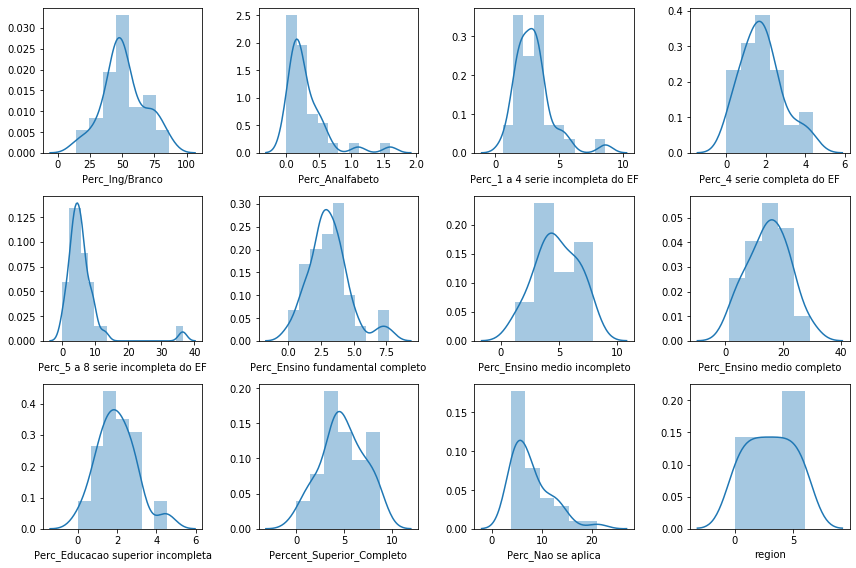

In [37]:
# plota um histograma com a distribuição dos dados
rows = 3
cols = 4
to_exclude = 14

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,8))
col = df_full.columns
index = 0

for i in range(rows):
    for j in range(cols):
        if index < to_exclude:
            sns.distplot(df_full[col[index]], ax = ax[i][j])
        index += 1
        
plt.tight_layout()

#### Escalonando os dados que não possuem uma distribuição normal

In [38]:
# copy the data
df_max_scaled = df_full.copy()

# apply normalization techniques on Column 1
df_max_scaled['Perc_Ing/Branco'] = df_max_scaled['Perc_Ing/Branco'] /df_max_scaled['Perc_Ing/Branco'].abs().max()
df_max_scaled['Perc_Analfabeto'] = df_max_scaled['Perc_Analfabeto'] /df_max_scaled['Perc_Analfabeto'].abs().max()
df_max_scaled['Perc_Ensino medio incompleto'] = df_max_scaled['Perc_Ensino medio incompleto'] /df_max_scaled['Perc_Ensino medio incompleto'].abs().max()
df_max_scaled['Perc_Ensino medio completo'] = df_max_scaled['Perc_Ensino medio completo'] /df_max_scaled['Perc_Ensino medio completo'].abs().max()
df_max_scaled['region'] = df_max_scaled['region'] /df_max_scaled['region'].abs().max()

# view normalized data
display(df_max_scaled)

,Perc_Ing/Branco,Perc_Analfabeto,Perc_1 a 4 serie incompleta do EF,Perc_4 serie completa do EF,Perc_5 a 8 serie incompleta do EF,Perc_Ensino fundamental completo,Perc_Ensino medio incompleto,Perc_Ensino medio completo,Perc_Educacao superior incompleta,Percent_Superior_Completo,Perc_Nao se aplica,region,Population,Casos_Por_100Mil_Habitantes
0,0.564825,0.410676,4.043229,2.458394,5.987156,4.005248,0.807074,0.565384,2.637939,4.516263,3.777363,0.166667,20284891,142.776217
1,0.506691,0.182596,3.354400,1.944579,5.493437,2.868255,0.837431,0.588806,3.208556,6.562956,8.458921,0.166667,20284891,10.140552
2,0.580837,0.267521,2.510684,1.335470,4.166667,2.991453,0.564204,0.507055,1.923077,8.226496,8.760684,0.166667,20284891,9.228544
3,0.476501,0.256432,3.545657,2.099723,6.640985,4.131626,0.959177,0.729868,2.878303,5.566708,4.408334,0.166667,20284891,181.721460
4,0.511966,0.175637,3.390227,1.776946,5.050269,3.507131,0.684982,0.645116,2.852467,7.435118,6.990881,0.166667,20284891,21.084659
5,0.384764,0.327543,5.148598,3.997488,8.706572,5.274173,1.000000,0.719882,2.344077,7.660109,3.934701,0,2166860,220.503401
6,0.624140,0.000000,1.459854,0.729927,5.109489,2.189781,0.734230,0.422168,2.919708,7.299270,8.029197,0,2166860,6.322513
7,0.243161,0.105387,5.723906,3.198653,9.932660,6.902357,0.931384,0.967959,4.545455,8.754209,3.872054,0,2166860,27.412939
8,0.527751,0.077764,2.774327,1.697723,7.204969,3.105590,0.635192,0.718472,2.318841,6.004141,4.927536,0,2166860,111.451594
9,0.481024,0.283258,3.031674,2.262443,8.235294,3.665158,0.884709,0.706605,1.561086,3.733032,7.624434,0,2166860,203.981799


## Analises

In [42]:
def PlotPizzaChart(dataSource):
    x = dataSource
    y = ['Analfabeto', '1 a 4 serie incompleta do EF', '4 serie completa do EF', '5 a 8 serie incompleta do EF', 
     'Ensino fundamental completo', 'Ensino medio incompleto', 'Ensino medio completo', 'Educacao superior incompleta',
    'Educacao superior completa']

    colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))

    # plot
    fig, ax = plt.subplots()
    ax.pie(x, colors=colors, radius=2, center=(3, 3),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, labels=y)
    

def GetTotalsPerSchooling(ds_2016, ds_2017, ds_2018, ds_2019, ds_2020):
    total_analfabeto = ds_2016.iloc[12]['Analfabeto'] + ds_2017.iloc[12]['Analfabeto'] + ds_2018.iloc[12]['Analfabeto'] + ds_2019.iloc[12]['Analfabeto']
    total_1_4_serie_incomp = ds_2016.iloc[12]['1 a 4 serie incompleta do EF'] + ds_2017.iloc[12]['1 a 4 serie incompleta do EF'] + ds_2018.iloc[12]['1 a 4 serie incompleta do EF'] + ds_2019.iloc[12]['1 a 4 serie incompleta do EF'] + ds_2020.iloc[12]['1 a 4 serie incompleta do EF']
    total_1_4_serie_comp = ds_2016.iloc[12]['4 serie completa do EF'] + ds_2017.iloc[12]['4 serie completa do EF'] + ds_2018.iloc[12]['4 serie completa do EF'] + ds_2019.iloc[12]['4 serie completa do EF'] + ds_2020.iloc[12]['4 serie completa do EF']
    total_5_8_incomp = ds_2016.iloc[12]['5 a 8 serie incompleta do EF'] + ds_2017.iloc[12]['5 a 8 serie incompleta do EF'] + ds_2018.iloc[12]['5 a 8 serie incompleta do EF'] + ds_2019.iloc[12]['5 a 8 serie incompleta do EF'] + ds_2020.iloc[12]['5 a 8 serie incompleta do EF']
    total_fund_comp = ds_2016.iloc[12]['Ensino fundamental completo'] + ds_2017.iloc[12]['Ensino fundamental completo'] + ds_2018.iloc[12]['Ensino fundamental completo'] + ds_2019.iloc[12]['Ensino fundamental completo'] + ds_2020.iloc[12]['Ensino fundamental completo']
    total_medio_incomp = ds_2016.iloc[12]['Ensino medio incompleto'] + ds_2017.iloc[12]['Ensino medio incompleto'] + ds_2018.iloc[12]['Ensino medio incompleto'] + ds_2019.iloc[12]['Ensino medio incompleto'] + ds_2020.iloc[12]['Ensino medio incompleto']
    total_medio_comp = ds_2016.iloc[12]['Ensino medio completo'] + ds_2017.iloc[12]['Ensino medio completo'] + ds_2018.iloc[12]['Ensino medio completo'] + ds_2019.iloc[12]['Ensino medio completo'] + ds_2020.iloc[12]['Ensino medio completo']
    total_superior_incomp = ds_2016.iloc[12]['Educacao superior incompleta'] + ds_2017.iloc[12]['Educacao superior incompleta'] + ds_2018.iloc[12]['Educacao superior incompleta'] + ds_2019.iloc[12]['Educacao superior incompleta'] + ds_2020.iloc[12]['Educacao superior incompleta']
    total_superior_comp = ds_2016.iloc[12]['Educacao superior completa'] + ds_2017.iloc[12]['Educacao superior completa'] + ds_2018.iloc[12]['Educacao superior completa'] + ds_2019.iloc[12]['Educacao superior completa'] + ds_2020.iloc[12]['Educacao superior completa']
    
    data = {'Analfabeto': total_analfabeto,
            '4 serie incompleta do EF': total_1_4_serie_incomp,
            '4 serie completa do EF': total_1_4_serie_comp,
            '5 a 8 serie incompleta do EF': total_5_8_incomp,
            'Ensino fundamental completo': total_fund_comp,
            'Ensino medio incompleto': total_medio_incomp,
            'Ensino medio completo': total_medio_comp,
            'Educacao superior incompleta': total_superior_incomp,
            'Educacao superior completa': total_superior_comp}
   
    df = pd.Series(data=data)
    
    return df

def ChangeObjectToNumeric(dataSource):
    labels = ['Ign/Branco'                  
                ,'Analfabeto'                  
                ,'1 a 4 serie incompleta do EF'
                ,'4 serie completa do EF'      
                ,'5 a 8 serie incompleta do EF'
                ,'Ensino fundamental completo' 
                ,'Ensino medio incompleto'     
                ,'Ensino medio completo'       
                ,'Educacao superior incompleta'
                ,'Educacao superior completa'  
                ,'Nao se aplica']
    for label in labels:
        dataSource[label] = pd.to_numeric(dataSource[label])
        
        
    return dataSource




#### Distribuição dos casos por escolaridades nos 5 anos

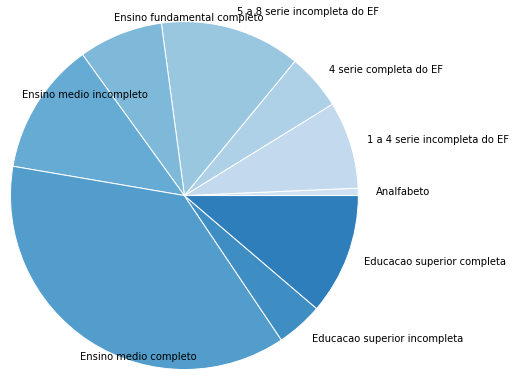

In [43]:
ChangeObjectToNumeric(ds_escolaridade_2016)
ChangeObjectToNumeric(ds_escolaridade_2017)
ChangeObjectToNumeric(ds_escolaridade_2018)
ChangeObjectToNumeric(ds_escolaridade_2019)
ChangeObjectToNumeric(ds_escolaridade_2020)

data_total_for_schooling = GetTotalsPerSchooling(ds_escolaridade_2016, ds_escolaridade_2017, ds_escolaridade_2018, ds_escolaridade_2019, ds_escolaridade_2020)


PlotPizzaChart(data_total_for_schooling)

#### Distribuição da escolaridade ao longo dos anos

Text(0.5, 1.0, 'Casos Por Escolaridade ao longo dos anos')

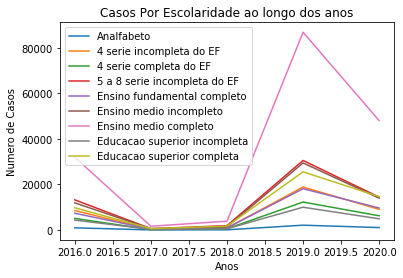

In [44]:
def GetTotalSchooling(dataSource, scholling):
    return pd.to_numeric(dataSource.iloc[12][scholling])

def GetDataSourceSchollingAlongYears(ds_2016, ds_2017, ds_2018, ds_2019, ds_2020):
    data = {'Ano': [2016, 2017, 2018, 2019, 2020],
        'Analfabeto': [GetTotalSchooling(ds_2016, 'Analfabeto'), 
                        GetTotalSchooling(ds_2017, 'Analfabeto'), 
                        GetTotalSchooling(ds_2018, 'Analfabeto'),
                        GetTotalSchooling(ds_2019, 'Analfabeto'),
                        GetTotalSchooling(ds_2020, 'Analfabeto')],
        '4 serie incompleta do EF': [GetTotalSchooling(ds_2016, '1 a 4 serie incompleta do EF'), 
                        GetTotalSchooling(ds_2017, '1 a 4 serie incompleta do EF'), 
                        GetTotalSchooling(ds_2018, '1 a 4 serie incompleta do EF'),
                        GetTotalSchooling(ds_2019, '1 a 4 serie incompleta do EF'),
                        GetTotalSchooling(ds_2020, '1 a 4 serie incompleta do EF')],
        '4 serie completa do EF': [GetTotalSchooling(ds_2016, '4 serie completa do EF'), 
                        GetTotalSchooling(ds_2017, '4 serie completa do EF'), 
                        GetTotalSchooling(ds_2018, '4 serie completa do EF'),
                        GetTotalSchooling(ds_2019, '4 serie completa do EF'),
                        GetTotalSchooling(ds_2020, '4 serie completa do EF')],
        '5 a 8 serie incompleta do EF': [GetTotalSchooling(ds_2016, '5 a 8 serie incompleta do EF'), 
                        GetTotalSchooling(ds_2017, '5 a 8 serie incompleta do EF'), 
                        GetTotalSchooling(ds_2018, '5 a 8 serie incompleta do EF'),
                        GetTotalSchooling(ds_2019, '5 a 8 serie incompleta do EF'),
                        GetTotalSchooling(ds_2020, '5 a 8 serie incompleta do EF')],
        'Ensino fundamental completo': [GetTotalSchooling(ds_2016, 'Ensino fundamental completo'), 
                        GetTotalSchooling(ds_2017, 'Ensino fundamental completo'), 
                        GetTotalSchooling(ds_2018, 'Ensino fundamental completo'),
                        GetTotalSchooling(ds_2019, 'Ensino fundamental completo'),
                        GetTotalSchooling(ds_2020, 'Ensino fundamental completo')],
         'Ensino medio incompleto': [GetTotalSchooling(ds_2016, 'Ensino medio incompleto'), 
                        GetTotalSchooling(ds_2017, 'Ensino medio incompleto'), 
                        GetTotalSchooling(ds_2018, 'Ensino medio incompleto'),
                        GetTotalSchooling(ds_2019, 'Ensino medio incompleto'),
                        GetTotalSchooling(ds_2020, 'Ensino medio incompleto')],
        'Ensino medio completo': [GetTotalSchooling(ds_2016, 'Ensino medio completo'), 
                        GetTotalSchooling(ds_2017, 'Ensino medio completo'), 
                        GetTotalSchooling(ds_2018, 'Ensino medio completo'),
                        GetTotalSchooling(ds_2019, 'Ensino medio completo'),
                        GetTotalSchooling(ds_2020, 'Ensino medio completo')],
        'Educacao superior incompleta': [GetTotalSchooling(ds_2016, 'Educacao superior incompleta'), 
                        GetTotalSchooling(ds_2017, 'Educacao superior incompleta'), 
                        GetTotalSchooling(ds_2018, 'Educacao superior incompleta'),
                        GetTotalSchooling(ds_2019, 'Educacao superior incompleta'),
                        GetTotalSchooling(ds_2020, 'Educacao superior incompleta')],
        'Educacao superior completa': [GetTotalSchooling(ds_2016, 'Educacao superior completa'), 
                        GetTotalSchooling(ds_2017, 'Educacao superior completa'),
                        GetTotalSchooling(ds_2018, 'Educacao superior completa'),
                        GetTotalSchooling(ds_2019, 'Educacao superior completa'),
                        GetTotalSchooling(ds_2020, 'Educacao superior completa')]}
    df = pd.Series(data=data)
    
    return df
    

df_scholling_along_years = GetDataSourceSchollingAlongYears(ds_escolaridade_2016, ds_escolaridade_2017, ds_escolaridade_2018, ds_escolaridade_2019, ds_escolaridade_2020)    




years = df_scholling_along_years['Ano']


an = df_scholling_along_years['Analfabeto']
plt.plot(years, an, label = "Analfabeto" ) 

_4serie_inc = df_scholling_along_years['4 serie incompleta do EF']
plt.plot(years, _4serie_inc, label = "4 serie incompleta do EF" )

_4serie_comp = df_scholling_along_years['4 serie completa do EF']
plt.plot(years, _4serie_comp, label = "4 serie completa do EF" )

_5_8serie_inc = df_scholling_along_years['5 a 8 serie incompleta do EF']
plt.plot(years, _5_8serie_inc, label = "5 a 8 serie incompleta do EF" )						

fund_comp = df_scholling_along_years['Ensino fundamental completo']
plt.plot(years, fund_comp, label = "Ensino fundamental completo" )

med_inc = df_scholling_along_years['Ensino medio incompleto']
plt.plot(years, med_inc, label = "Ensino medio incompleto" )

med_comp = df_scholling_along_years['Ensino medio completo']
plt.plot(years, med_comp, label = "Ensino medio completo" )

sup_inc = df_scholling_along_years['Educacao superior incompleta']
plt.plot(years, sup_inc, label = "Educacao superior incompleta" )

sup_comp = df_scholling_along_years['Educacao superior completa']
plt.plot(years, sup_comp, label = "Educacao superior completa" )


plt.xlabel("Anos") 
plt.ylabel("Numero de Casos")
plt.legend()
plt.title('Casos Por Escolaridade ao longo dos anos')

#### Total de Casos ao longo dos anos

Text(0.5, 1.0, 'Totais de Casos ao longo dos anos')

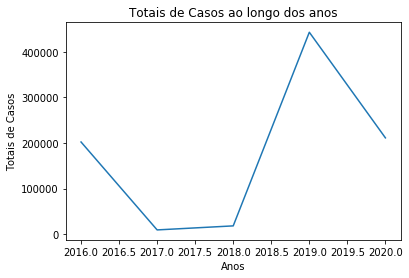

In [46]:
def GetDataSourceTotalsAlongYears(ds_2016, ds_2017, ds_2018, ds_2019, ds_2020):
    data = {'Ano': [2016, 2017, 2018, 2019, 2020],
        'Total': [GetTotalSchooling(ds_2016, 'Total'), 
                        GetTotalSchooling(ds_2017, 'Total'), 
                        GetTotalSchooling(ds_2018, 'Total'),
                        GetTotalSchooling(ds_2019, 'Total'),
                        GetTotalSchooling(ds_2020, 'Total')]}
    
    df = pd.Series(data=data)
    
    return df
    
    
    
df_total_cases_along_years = GetDataSourceTotalsAlongYears(ds_escolaridade_2016, ds_escolaridade_2017, ds_escolaridade_2018, ds_escolaridade_2019, ds_escolaridade_2020)


years = df_total_cases_along_years['Ano']
totals = df_total_cases_along_years['Total']

plt.plot(years, totals)


plt.xlabel("Anos") 
plt.ylabel("Totais de Casos")
plt.title('Totais de Casos ao longo dos anos')

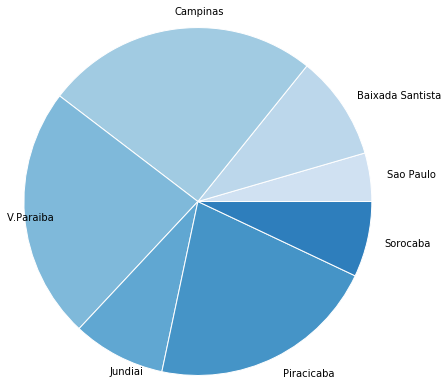

In [47]:
def GetTotalRow(dataSource, rownumber):
    return pd.to_numeric(dataSource.iloc[rownumber]['Total'])

def GetDataSourceTotalsRegions(ds_2016, ds_2017, ds_2018, ds_2019, ds_2020):
    citiesNames = ['Sao Paulo', 'Baixada Santista', 'Campinas', 'V.Paraiba n1', 'V.Paraiba n2',
                  'V.Paraiba n3', 'V.Paraiba n4', 'V.Paraiba n5', 'Jundiai', 'Piracicaba',
                  'Sorocaba']
    data = {'Sao Paulo': 0, 'Baixada Santista': 0, 'Campinas': 0, 'V.Paraiba n1': 0, 'V.Paraiba n2': 0,
           'V.Paraiba n3': 0, 'V.Paraiba n4': 0, 'V.Paraiba n5': 0, 'Jundiai': 0, 'Piracicaba': 0,
           'Sorocaba': 0}
    
    for row_number in range(0, 11):
        data[citiesNames[row_number]] +=  GetTotalRow(ds_2016, row_number)
        
    for row_number in range(0, 11):
        data[citiesNames[row_number]] +=  GetTotalRow(ds_2017, row_number)
        
    for row_number in range(0, 11):
        data[citiesNames[row_number]] +=  GetTotalRow(ds_2018, row_number)
        
    for row_number in range(0, 11):
        data[citiesNames[row_number]] +=  GetTotalRow(ds_2019, row_number)
        
    for row_number in range(0, 11):
        data[citiesNames[row_number]] +=  GetTotalRow(ds_2020, row_number)
        
    data_per_100thousand = {'Sao Paulo': (data['Sao Paulo'] / 20284891) * 100000, 
                                      'Baixada Santista': (data['Baixada Santista'] / 1881706) * 100000, 
                                      'Campinas': (data['Campinas'] / 3304338) * 100000, 
                                      'V.Paraiba': ((data['V.Paraiba n1'] + data['V.Paraiba n2'] + data['V.Paraiba n3']
                                      + data['V.Paraiba n4'] + data['V.Paraiba n5']) / 2576250) * 100000, 
                                      'Jundiai': (data['Jundiai']  / 825470) * 100000, 
                                      'Piracicaba': (data['Piracicaba'] / 1508439) * 100000, 
                                      'Sorocaba': (data['Sorocaba'] / 2166860) * 100000}
        
    return pd.Series(data=data_per_100thousand)
    

df_cases_cities = GetDataSourceTotalsRegions(ds_escolaridade_2016, ds_escolaridade_2017, ds_escolaridade_2018, ds_escolaridade_2019, ds_escolaridade_2020)


x = df_cases_cities
y =  ['Sao Paulo', 'Baixada Santista', 'Campinas', 'V.Paraiba', 'Jundiai', 'Piracicaba', 'Sorocaba']

colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))

# plot
fig, ax = plt.subplots()
ax.pie(x, colors=colors, radius=2, center=(3, 3),
wedgeprops={"linewidth": 1, "edgecolor": "white"}, labels=y)



plt.show()


Text(0.5, 1.0, 'Casos Por Regiões ao longo dos anos')

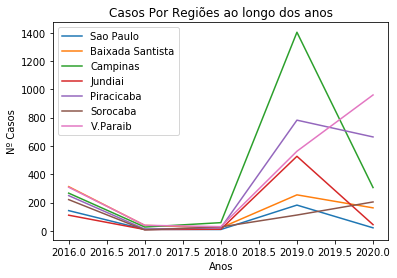

In [48]:
def GetDsTotalRegionsAlongYears(ds_2016, ds_2017, ds_2018, ds_2019, ds_2020):
    data = {'Anos': [2016, 2017, 2018, 2019, 2020],
            'Sao Paulo': [],
            'Baixada Santista': [],
            'Campinas': [], 
            'V.Paraiba n1': [], 
            'V.Paraiba n2': [],
            'V.Paraiba n3': [], 
            'V.Paraiba n4': [], 
            'V.Paraiba n5': [], 
            'Jundiai': [], 
            'Piracicaba': [],
            'Sorocaba': []}
    
    citiesNames = ['Sao Paulo', 'Baixada Santista', 'Campinas', 'V.Paraiba n1', 'V.Paraiba n2',
                  'V.Paraiba n3', 'V.Paraiba n4', 'V.Paraiba n5', 'Jundiai', 'Piracicaba',
                  'Sorocaba']
    
    for row_number in range(0, 11):
        data[citiesNames[row_number]].append(GetTotalRow(ds_2016, row_number))
    
    for row_number in range(0, 11):
        data[citiesNames[row_number]].append(GetTotalRow(ds_2017, row_number))
        
    for row_number in range(0, 11):
        data[citiesNames[row_number]].append(GetTotalRow(ds_2018, row_number)) 
        
    for row_number in range(0, 11):
        data[citiesNames[row_number]].append(GetTotalRow(ds_2019, row_number))
        
    for row_number in range(0, 11):
        data[citiesNames[row_number]].append(GetTotalRow(ds_2020, row_number))
        
    data['V.Paraib'] = []  
    
    for idx in range(0, 5):
        total_year_vparaiba = 0
        for region in range(3, 8):
            total_year_vparaiba += data[citiesNames[region]][idx]
        
        data['V.Paraib'].append(total_year_vparaiba)
        
    for region in range(3, 8):
        data.pop(citiesNames[region], None)
    
    
    population = {'Sao Paulo': 20284891,
                  'Baixada Santista': 1881706,
                  'Campinas': 3304338,
                 'Jundiai': 825470,
                 'Piracicaba': 1508439,
                 'Sorocaba': 2166860,
                 'V.Paraib': 2576250}
    
    new_citiesNames = ['Sao Paulo'
                        ,'Baixada Santista'
                        ,'Campinas'
                        ,'Jundiai' 
                        ,'Piracicaba'
                        ,'Sorocaba' 
                        ,'V.Paraib']
    
    for idx in range(0, 5):
        for region in range(0, 7):
            data[new_citiesNames[region]][idx] = (data[new_citiesNames[region]][idx] / population[new_citiesNames[region]]) * 100000
            
    
        
    return pd.Series(data=data)

df_cities_along_years = GetDsTotalRegionsAlongYears(ds_escolaridade_2016, ds_escolaridade_2017, ds_escolaridade_2018, ds_escolaridade_2019, ds_escolaridade_2020)



years = df_cities_along_years['Anos']

labels = ['Sao Paulo'
                        ,'Baixada Santista'
                        ,'Campinas'
                        ,'Jundiai' 
                        ,'Piracicaba'
                        ,'Sorocaba' 
                        ,'V.Paraib']

for label in labels:
    data_label = df_cities_along_years[label]
    plt.plot(years, data_label, label = label )
    





plt.xlabel("Anos") 
plt.ylabel("Nº Casos")
plt.legend()
plt.title('Casos Por Regiões ao longo dos anos')

## Clusters 

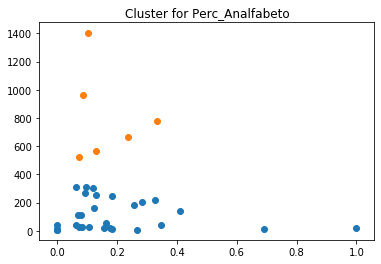

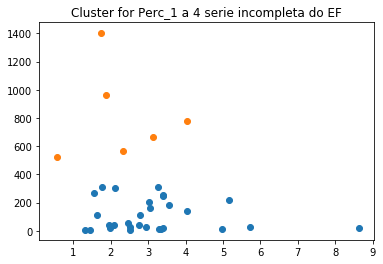

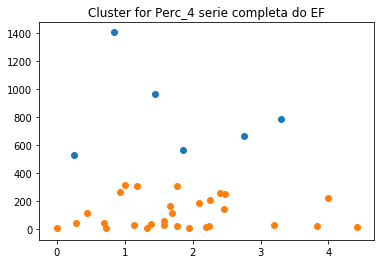

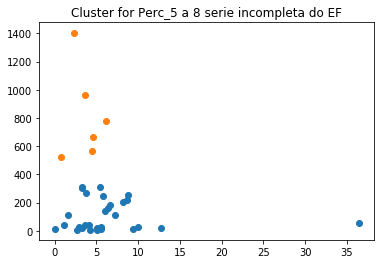

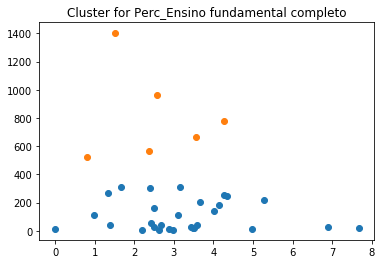

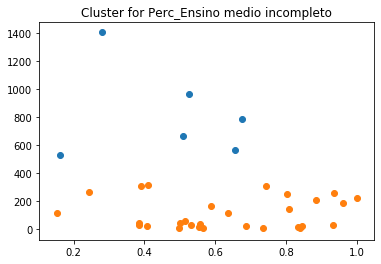

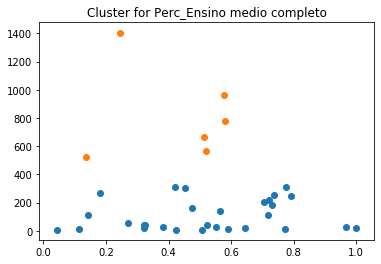

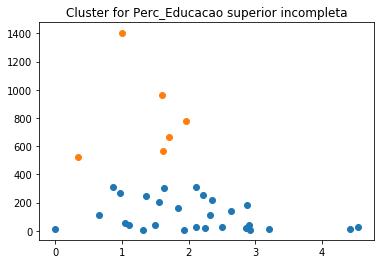

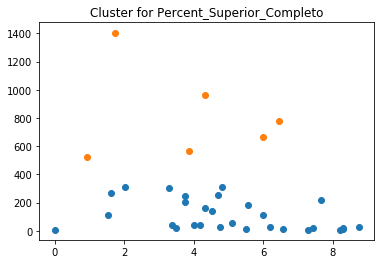

In [49]:
def PlotKMeans(label_name, label_y):
    X = df_max_scaled[[label_name, label_y]].to_numpy()

    model = KMeans(n_clusters=2)
    model.fit(X)
    yhat = model.predict(X)
    clusters = unique(yhat)
    
    for cluster in clusters:
        row_ix = where(yhat == cluster)
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    
    pyplot.title('Cluster for ' + label_name)
    pyplot.show()
    

labels = ['Perc_Analfabeto'	
          ,'Perc_1 a 4 serie incompleta do EF'
          ,'Perc_4 serie completa do EF'
          ,'Perc_5 a 8 serie incompleta do EF'
          ,'Perc_Ensino fundamental completo'
          ,'Perc_Ensino medio incompleto'
          ,'Perc_Ensino medio completo'
          ,'Perc_Educacao superior incompleta'
          ,'Percent_Superior_Completo']

for label in labels:
    PlotKMeans(label, 'Casos_Por_100Mil_Habitantes')

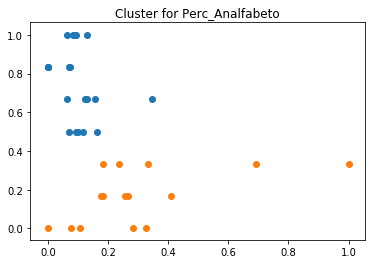

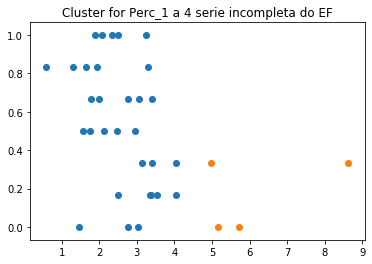

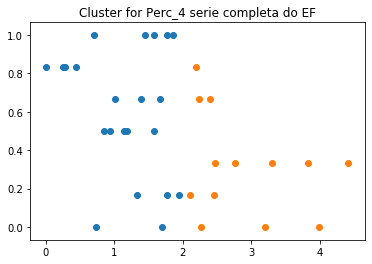

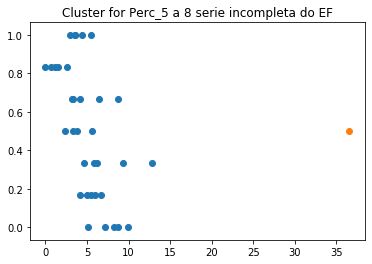

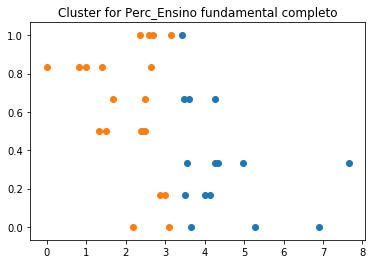

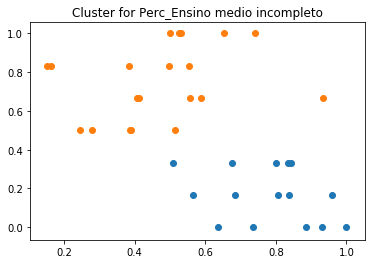

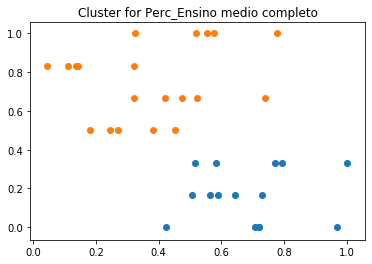

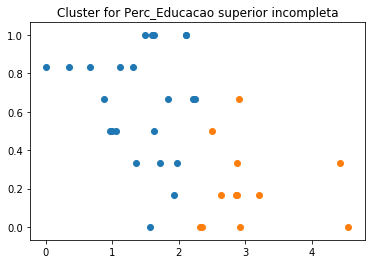

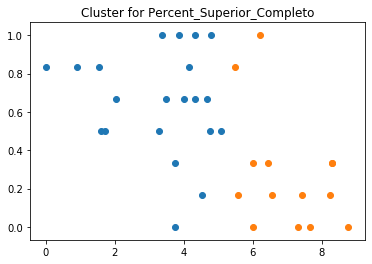

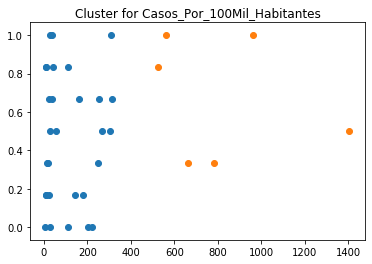

In [50]:
labels = ['Perc_Analfabeto'	
          ,'Perc_1 a 4 serie incompleta do EF'
          ,'Perc_4 serie completa do EF'
          ,'Perc_5 a 8 serie incompleta do EF'
          ,'Perc_Ensino fundamental completo'
          ,'Perc_Ensino medio incompleto'
          ,'Perc_Ensino medio completo'
          ,'Perc_Educacao superior incompleta'
          ,'Percent_Superior_Completo'
         ,'Casos_Por_100Mil_Habitantes']

for label in labels:
    PlotKMeans(label, 'region')